# Project: England Premier League 2008-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For our analysis we have selected the European Soccer Database which gives us various tables containing details about 25000 matches, 10000 players, various players and team attributes from 2008-2016.
>
>This soccer database comes from Kaggle and is well suited for data analysis and machine learning.
>
>#Dataset characterstics:
    >
    >-The database is stored in a SQLite database.
    >
    >-25,000 matches
    >
    >-10,000 players
    >
    >-11 European Countries with their lead championship
    >
    >-Seasons 2008 to 2016
    >
    >-Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
    >
    >-Team line up with squad formation (X, Y coordinates)
    >
    >-Betting odds from up to 10 providers
    >
    >-Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches


### Research Questions:
#### Question 1: 
     Is there an advantage for the home teams?
#### Question 2:
     Which team has the best home and away record?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Importing the teams, leagues and matches from 2008-2016

team = pd.read_csv("C:\\Users\\neepa\\OneDrive\\Desktop\\Udacity\\Project 2\\team.csv")
league= pd.read_csv("C:\\Users\\neepa\\OneDrive\\Desktop\\Udacity\\Project 2\\league.csv")
match = pd.read_csv("C:\\Users\\neepa\\OneDrive\\Desktop\\Udacity\\Project 2\\match.csv")

In [3]:
#Exploring how team data looks
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [4]:
team.info()        #11 missing values in team_api_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [5]:
#Exploring league data
league.head(11)       #League id for England Premier League = 1729

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
#Exploring Match data
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [7]:
#Exploring how Match data looks
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


After initial data wrangling we look at how our team,match and league data looks like.

We find out that the league we are interested in has the league_id 1729, that is the England Premier League.

Since the attributes we are interested in for our analysis dont have any missing values , we will remove all the columns from our dataset(matches played) that has missing value.

    Data         Interested Attributes
    match        league_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal

### Data Cleaning
-Removing all columns containing null values

-Selecting the required subset

In [8]:
match.dropna(axis=1)                            #Removing all columns with null values

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


Since we are interested in the matches played only in England Premier League we make a subset named epl_match on which we will work further to analyse and get our results.

In [9]:
#To find all the matches in England Premier League we make a subset
epl_match = match[match["league_id"] == 1729].copy()

<a id='eda'></a>
## Exploratory Data Analysis

> We start by exploring the basic info of our dataset(number of columns, number of rows, how data looks and summary statistics of epl_match)


In [10]:
epl_match.info()  #3040 matches played from 2008-2016

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 1728 to 4767
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 2.7+ MB


In [11]:
epl_match.head(10) #How 115 attributes look like

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.00,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.00,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.70,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.00,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.00,1.91,3.30,3.75
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,3.40,2.05,3.3,4.00,2.00,3.25,3.75,2.00,3.25,3.50
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,2.20,3.20,3.4,2.30,3.00,3.25,2.30,2.80,3.25,2.30
1735,1736,1729,1729,2008/2009,1,2008-08-16 00:00:00,489049,8559,10194,3,...,4.33,1.85,3.4,4.80,1.83,3.25,4.50,1.80,3.25,4.33
1736,1737,1729,1729,2008/2009,1,2008-08-16 00:00:00,489050,8667,9879,2,...,2.75,2.60,3.4,2.80,2.60,3.25,2.60,2.60,3.25,2.50
1737,1738,1729,1729,2008/2009,1,2008-08-17 00:00:00,489051,8455,8462,4,...,10.00,1.33,5.0,11.00,1.33,4.75,9.00,1.33,4.20,10.00


In [12]:
epl_match.describe()               #Maximum number of stages(number of rounds of matches in a season) = 38

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,3040.000000,3040.0,3040.0,3040.00000,3.040000e+03,3040.00000,3040.00000,3040.000000,3040.000000,3040.0,...,2320.000000,3040.000000,3040.000000,3040.000000,1899.000000,1899.000000,1899.000000,1900.000000,1900.000000,1900.000000
mean,3248.500000,1729.0,1729.0,19.50000,1.178767e+06,9142.27500,9142.27500,1.550987,1.159539,1.0,...,4.859233,2.712200,3.955470,4.956706,2.606840,3.761980,4.566435,2.625553,3.773584,4.790621
std,877.716735,0.0,0.0,10.96766,4.909627e+05,753.08936,753.08936,1.311615,1.144629,0.0,...,3.826951,1.692002,1.009081,3.984338,1.586001,0.842088,3.301710,1.655792,0.837965,3.786069
min,1729.000000,1729.0,1729.0,1.00000,4.890420e+05,8191.00000,8191.00000,0.000000,0.000000,1.0,...,1.250000,1.090000,2.500000,1.220000,1.100000,3.000000,1.250000,1.100000,3.000000,1.220000
25%,2488.750000,1729.0,1729.0,10.00000,7.946915e+05,8528.00000,8528.00000,1.000000,0.000000,1.0,...,2.500000,1.670000,3.300000,2.500000,1.650000,3.250000,2.450000,1.620000,3.250000,2.500000
50%,3248.500000,1729.0,1729.0,19.50000,1.127220e+06,8659.00000,8659.00000,1.000000,1.000000,1.0,...,3.500000,2.200000,3.600000,3.600000,2.100000,3.400000,3.400000,2.100000,3.400000,3.400000
75%,4008.250000,1729.0,1729.0,29.00000,1.537336e+06,9879.00000,9879.00000,2.000000,2.000000,1.0,...,5.500000,3.000000,4.100000,5.500000,2.800000,3.900000,5.250000,2.800000,3.900000,5.500000
max,4768.000000,1729.0,1729.0,38.00000,1.989079e+06,10261.00000,10261.00000,9.000000,6.000000,1.0,...,29.000000,15.000000,10.000000,29.000000,12.000000,8.500000,21.000000,13.000000,8.500000,26.000000


From initial exploration we deduced that our dataset(epl_match) contains the details of 3040 matches with 115 different attributes to judge on.

The number of stages through summary statistics indicate that there are 38 matches played in a single season by a team.  

### Research Question 1 (Is there an advantage for the home teams?)
Our first research question states that wehave to analyse whether the teams who play at home has an increased advantage or not.
We will try to indicate that by seeing whether the home or away teams have scored more points over the course of last 8 years.

Since there is no attribute indicating the number of points won or lost by the teams in the match we build the following vectors to calculate it and add to our dataset using loc[].


In [13]:
# Creating new variables
#Initializing draws
epl_match['points_scored_home']=1
epl_match['points_scored_away']=1

home_win_mask = match['home_team_goal']> match['away_team_goal']           #Returns true if home team wins
away_win_mask = match['home_team_goal']< match['away_team_goal']           #Returns true if away team wins

#home win(away loss)
epl_match.loc[home_win_mask,['points_scored_home','points_scored_away']] =[3,0]  #loc[] sets value for true rows
#away win(home loss)
epl_match.loc[away_win_mask,['points_scored_home','points_scored_away']] =[0,3]

As indicated in the above vectors a team is allocated 3 points for a win when they score more goals than the other and 0 for a loss. 1 point is awarded if both the teams score same number of goals resulting in a draw. We then create new attributes for the points scored by home/away team in each match as shown below in our dataset.

In [14]:
epl_match.head()               #Shows newly created attributes.

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,points_scored_home,points_scored_away
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00,1,1
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00,3,0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73,0,3
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80,3,0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75,3,0


Now to show the total number of points scored by home/away teams in the last 8 years we calculate the sum of both attributes using the function sum().

In [15]:
epl_match[['points_scored_home','points_scored_away']].sum()        #Total number of points scored by home and away teams

points_scored_home    4953
points_scored_away    3384
dtype: int64

We can see clearly that home teams had an advantage over the course of 2008-2016 as the number of points scored when playing at home is almost 1.5 times more than when playing away. This shows you are more likely to win when playing at home.

It has been further shown via a bar chart below -:

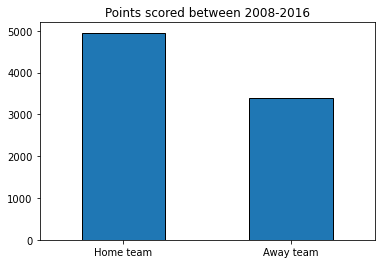

In [16]:
epl_match[['points_scored_home','points_scored_away']].sum().plot.bar(edgecolor='black');
plt.xticks([0,1],['Home team','Away team'],rotation=360);
plt.title('Points scored between 2008-2016');

### Research Question 2  (Which team has the best home and away record?)

Through our second reserach question we want to explore which team has the best home and away record during 2008-2016.

For this we will group the teams by their api_id and find the mean of points scored. 

Here, Mean = Total number of points scored/ Total number of matches

In [17]:
#To make the team names more informative we map the team ids to their names using map()
#We create a dictionary from dataframe

#Setting id as index,selecting team name, create a dictionary
#In this dictionary team id will be key and name values
team_name_dict =team.set_index('team_api_id')['team_long_name'].to_dict()
team_name_dict

{9987: 'KRC Genk',
 9993: 'Beerschot AC',
 10000: 'SV Zulte-Waregem',
 9994: 'Sporting Lokeren',
 9984: 'KSV Cercle Brugge',
 8635: 'RSC Anderlecht',
 9991: 'KAA Gent',
 9998: 'RAEC Mons',
 7947: 'FCV Dender EH',
 9985: 'Standard de Liège',
 8203: 'KV Mechelen',
 8342: 'Club Brugge KV',
 9999: 'KSV Roeselare',
 8571: 'KV Kortrijk',
 4049: 'Tubize',
 9996: 'Royal Excel Mouscron',
 10001: 'KVC Westerlo',
 9986: 'Sporting Charleroi',
 9997: 'Sint-Truidense VV',
 9989: 'Lierse SK',
 6351: 'KAS Eupen',
 1773: 'Oud-Heverlee Leuven',
 8475: 'Waasland-Beveren',
 8573: 'KV Oostende',
 274581: 'Royal Excel Mouscron',
 10260: 'Manchester United',
 10261: 'Newcastle United',
 9825: 'Arsenal',
 8659: 'West Bromwich Albion',
 8472: 'Sunderland',
 8650: 'Liverpool',
 8654: 'West Ham United',
 8528: 'Wigan Athletic',
 10252: 'Aston Villa',
 8456: 'Manchester City',
 8668: 'Everton',
 8655: 'Blackburn Rovers',
 8549: 'Middlesbrough',
 8586: 'Tottenham Hotspur',
 8559: 'Bolton Wanderers',
 10194: 'Stoke

In [18]:
#Now we use this dictionary to map the names to ids
epl_match['home_team_name']= epl_match['home_team_api_id'].map(team_name_dict)
epl_match['away_team_name']= epl_match['away_team_api_id'].map(team_name_dict)

In [19]:
 #Best Home record

bhr= epl_match.groupby('home_team_name')['points_scored_home'].mean()   

In [20]:
bhr.head(50)             #Mean of number of points scored by home team

home_team_name
Arsenal                    2.138158
Aston Villa                1.217105
Birmingham City            1.552632
Blackburn Rovers           1.421053
Blackpool                  1.052632
Bolton Wanderers           1.328947
Bournemouth                1.052632
Burnley                    1.184211
Cardiff City               1.052632
Chelsea                    2.217105
Crystal Palace             1.210526
Everton                    1.782895
Fulham                     1.578947
Hull City                  1.092105
Leicester City             1.789474
Liverpool                  1.980263
Manchester City            2.348684
Manchester United          2.394737
Middlesbrough              1.263158
Newcastle United           1.466165
Norwich City               1.381579
Portsmouth                 1.184211
Queens Park Rangers        1.105263
Reading                    1.052632
Southampton                1.684211
Stoke City                 1.644737
Sunderland                 1.276316
Swansea City 

In [21]:
bhr.max()         #Shows Team named Manchester united has the Best Home record with 2.39 points scored per match on an average
maxh_id=bhr.idxmax()
maxh_id

'Manchester United'

In [22]:
 #Best Away record
bar= epl_match.groupby('away_team_name')['points_scored_away'].mean()   

In [23]:
bar.head(50)                      #Mean of number of points scored by away team

away_team_name
Arsenal                    1.697368
Aston Villa                1.059211
Birmingham City            0.789474
Blackburn Rovers           0.750000
Blackpool                  1.000000
Bolton Wanderers           0.802632
Bournemouth                1.157895
Burnley                    0.473684
Cardiff City               0.526316
Chelsea                    1.717105
Crystal Palace             1.157895
Everton                    1.263158
Fulham                     0.833333
Hull City                  0.710526
Leicester City             1.421053
Liverpool                  1.480263
Manchester City            1.506579
Manchester United          1.769737
Middlesbrough              0.421053
Newcastle United           0.872180
Norwich City               0.697368
Portsmouth                 0.631579
Queens Park Rangers        0.508772
Reading                    0.421053
Southampton                1.210526
Stoke City                 0.855263
Sunderland                 0.868421
Swansea City 

In [24]:
bar.max()       #Shows Team named Manchester United has the Best Away record with 1.77 points scored per match on an average
maxa_id=bar.idxmax()
maxa_id

'Manchester United'

We confirm our results above by calculating the total number of points scored home/away by each team.
It indicates the most points home and away were also scored by the team named Manchester United

In [25]:
epl_match.groupby('home_team_name', as_index= False)['points_scored_home'].sum()

,home_team_name,points_scored_home
0,Arsenal,325
1,Aston Villa,185
2,Birmingham City,59
3,Blackburn Rovers,108
4,Blackpool,20
5,Bolton Wanderers,101
6,Bournemouth,20
7,Burnley,45
8,Cardiff City,20
9,Chelsea,337


In [26]:
epl_match.groupby('away_team_name', as_index= False)['points_scored_away'].sum()

,away_team_name,points_scored_away
0,Arsenal,258
1,Aston Villa,161
2,Birmingham City,30
3,Blackburn Rovers,57
4,Blackpool,19
5,Bolton Wanderers,61
6,Bournemouth,22
7,Burnley,18
8,Cardiff City,10
9,Chelsea,261


Since both records home and away belong to the same team we can conclude that the team named Manchester United has been the best team from 2008 to 2016.


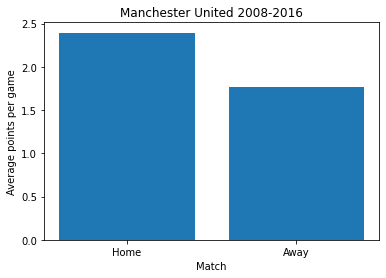

In [27]:
#Bar chart showing Average points per game home/away by Manchester United

plt.bar([1,2],[bhr.max(),bar.max()],tick_label=['Home','Away']);
plt.title('Manchester United 2008-2016');
plt.xlabel('Match');
plt.ylabel('Average points per game');

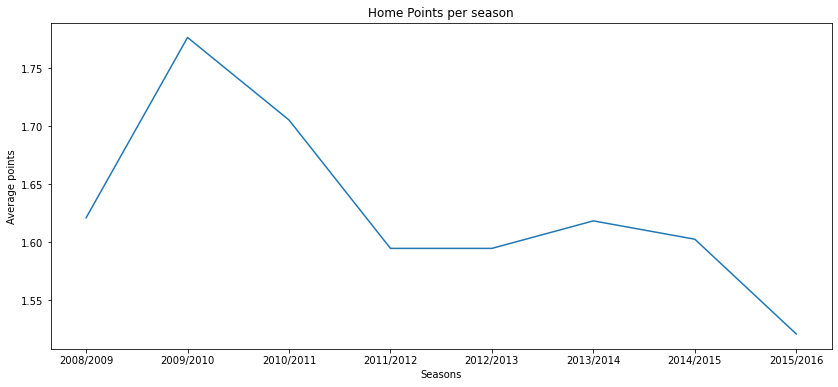

In [28]:
#Trends of home points over the seasons
epl_match.groupby(['season'])['points_scored_home'].mean().plot(figsize=[14,6]);
plt.title("Home Points per season");
plt.xlabel('Seasons');
plt.ylabel('Average points');

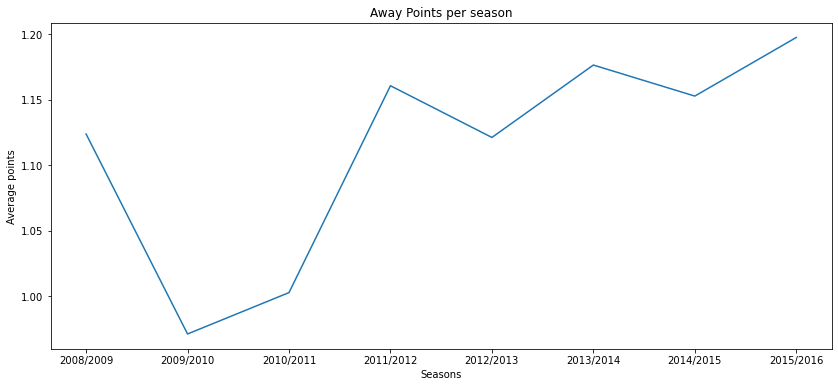

In [29]:
#Trends of away points over the seasons
epl_match.groupby(['season'])['points_scored_away'].mean().plot(figsize=[14,6]);
plt.title("Away Points per season");
plt.xlabel('Seasons');
plt.ylabel('Average points');

In [30]:
#Tracking home points over a season by teams using a heatmap
#Getting total home points
epl_match.groupby(['home_team_name','season'])['points_scored_home'].sum()

home_team_name           season   
Arsenal                  2008/2009    38
                         2009/2010    47
                         2010/2011    37
                         2011/2012    40
                         2012/2013    38
                                      ..
Wigan Athletic           2011/2012    22
                         2012/2013    18
Wolverhampton Wanderers  2009/2010    21
                         2010/2011    28
                         2011/2012    12
Name: points_scored_home, Length: 160, dtype: int64

In [31]:
#Unstacking season
epl_match.groupby(['home_team_name','season'])['points_scored_home'].sum().unstack('season')  
#NaN values show the team did not participated in the season

season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
home_team_name,,,,,,,,
Arsenal,38.0,47.0,37.0,40.0,38.0,44.0,41.0,40.0
Aston Villa,30.0,32.0,31.0,19.0,20.0,21.0,21.0,11.0
Birmingham City,NaN,33.0,26.0,NaN,NaN,NaN,NaN,NaN
Blackburn Rovers,25.0,36.0,28.0,19.0,NaN,NaN,NaN,NaN
Blackpool,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
Bolton Wanderers,26.0,24.0,35.0,16.0,NaN,NaN,NaN,NaN
Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
Burnley,NaN,26.0,NaN,NaN,NaN,NaN,19.0,NaN
Cardiff City,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN


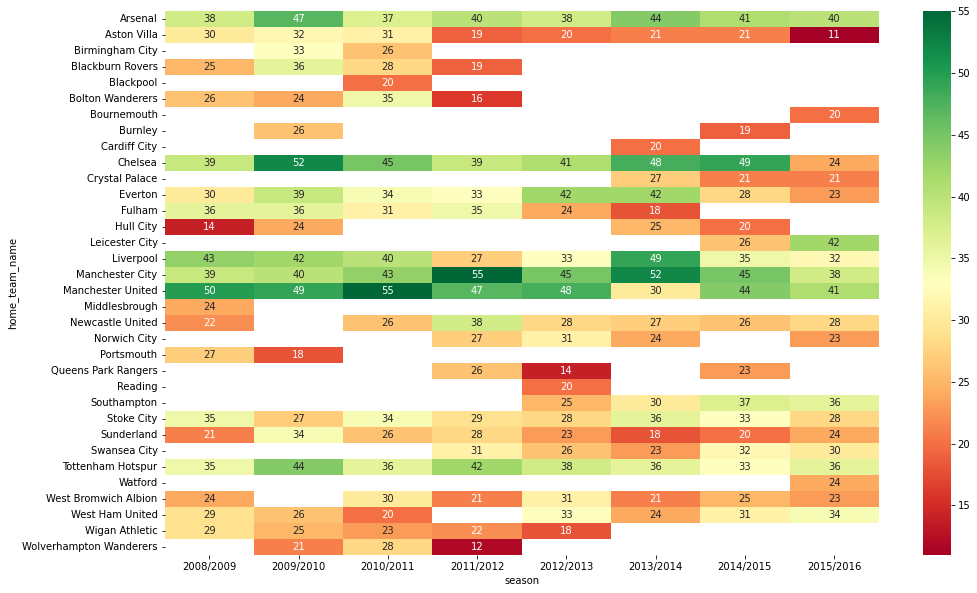

In [32]:
#Plotting heatmaps
plt.figure(figsize=[16,10])
sns.heatmap(epl_match.groupby(['home_team_name','season'])['points_scored_home'].sum().unstack('season'), annot=True,
            fmt='.0f', cmap="RdYlGn");

In [33]:
#Tracking away points over a season by teams using a heatmap
#Getting total away points
epl_match.groupby(['away_team_name','season'])['points_scored_away'].sum().unstack('season')  
#NaN values show the team did not participated in the season

season,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
away_team_name,,,,,,,,
Arsenal,34.0,28.0,31.0,30.0,35.0,35.0,34.0,31.0
Aston Villa,32.0,32.0,17.0,19.0,21.0,17.0,17.0,6.0
Birmingham City,NaN,17.0,13.0,NaN,NaN,NaN,NaN,NaN
Blackburn Rovers,16.0,14.0,15.0,12.0,NaN,NaN,NaN,NaN
Blackpool,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN
Bolton Wanderers,15.0,15.0,11.0,20.0,NaN,NaN,NaN,NaN
Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
Burnley,NaN,4.0,NaN,NaN,NaN,NaN,14.0,NaN
Cardiff City,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN


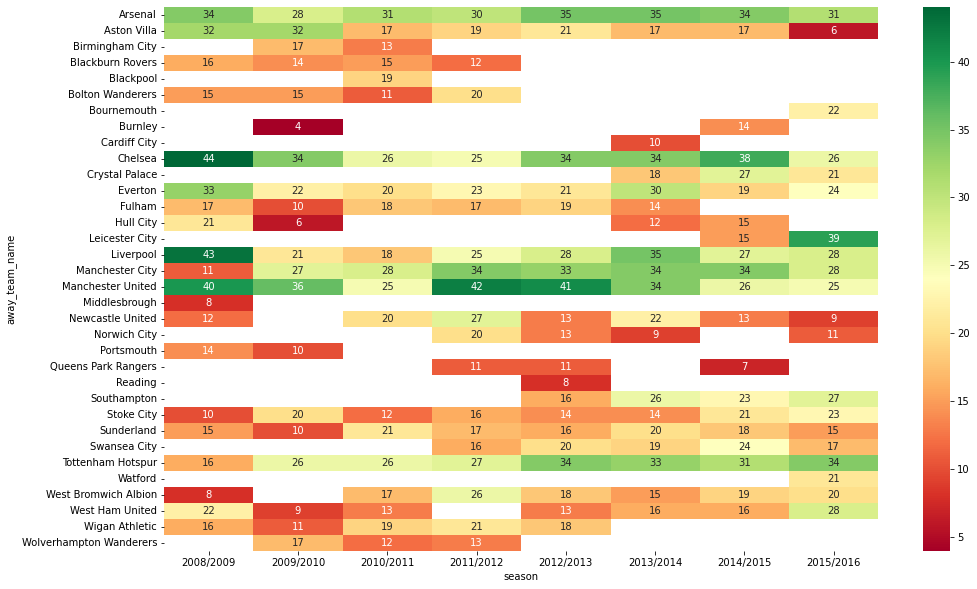

In [34]:
#Plotting heatmaps
plt.figure(figsize=[16,10])
sns.heatmap(epl_match.groupby(['away_team_name','season'])['points_scored_away'].sum().unstack('season'), annot=True,
            fmt='.0f', cmap="RdYlGn");

<a id='conclusions'></a>
## Conclusions

Research Question 1:
- Home teams have a clear advantage over the away teams
- Home teams are likely to score 1.5 times the points scored by away team.
- Trend of points won at home has been decreasing while increasing for points won by away teams during last 8 years. 

Research Question 2:
- Manchester United is the team with best home record (2.39 points per game)
- Manchester United is the team with best away record (1.77 points per game)
- Manchester United has been the best team from 2008 to 2016 in the English Premier League
- Chelsea 2008/09 won the most away points(44) in a single season between 2008-2016
- Manchester United 2010/11 and Manchester City 2011/12 won the most home points(55) in a single season between 2008-2016.

## Limitations

- Issues with the dataset
  - We are working with sample data, which implies uncertainty as the results might change with different sample.
  - Some players are missing from the lineup (NULL values) since their attributes have not been sourced from FIFA.
- Since there has been no Hypothesis testing we dont know if the results are significant or not.
- Missing Values of teams over a season since they did not compete in the league during that season.